In [2]:
%matplotlib inline
from utils import *
import matplotlib.colors as mcolors

## Neuron params

In [3]:
# Default params
R_m = 142 * 1e6                                     # 142 MΩ
V_th = 15 * 1e-3                                    # 15 mV
tau_m = 24 * 1e-3                                   # 24 ms                           
I_osc = 40 * 1e-12                                  # 40 pA
range_frac = 0.6                                    # fraction of range to use

## A - Mutual information heatmaps simulations vs theory

In [4]:
M = 10
res = 200
fs = np.linspace(1, 50, res)
etas = np.linspace(0.001, 0.3, res)
mis_approx = np.zeros((res,res))
mis_numerical = np.zeros((res,res))
for i, eta in enumerate(etas):
    print(i)
    for j, f in enumerate(fs):
        means, variances, Is_range = get_distr(R_m, V_th, eta, tau_m, I_osc, f, M, range_frac, N=1)
        mis_approx[i, j] = approx_mi(means, variances)
        mis_numerical[i, j] = numerical_mi(means, variances, n_samples=int(1e4))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


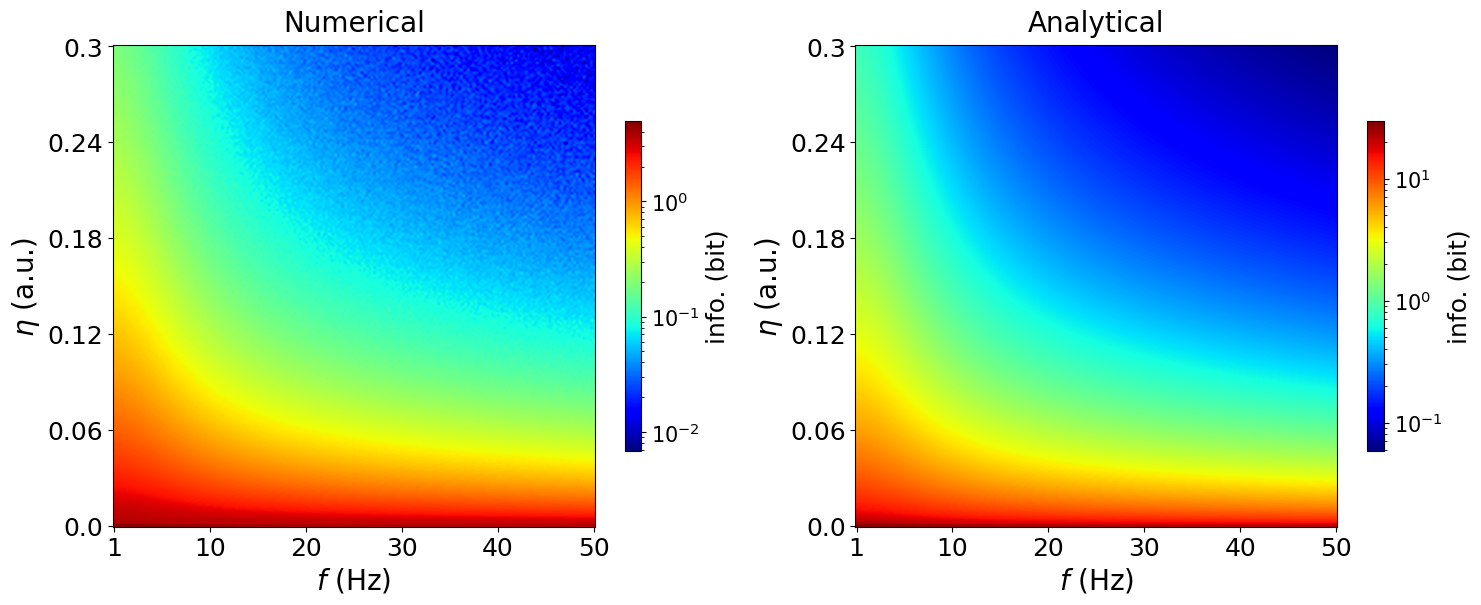

In [24]:
plt.figure(figsize=(15, 7))

# Plot for the Numerical data
plt.subplot(121)
plt.title('Numerical', fontsize=20, pad=10)
norm = mcolors.LogNorm(vmin=mis_numerical[mis_numerical > 0].min(), vmax=mis_numerical.max())
img1 = plt.imshow(mis_numerical, origin='lower', cmap='jet', norm=norm, interpolation='lanczos')
plt.xticks(np.linspace(0, res-1, 6), np.linspace(1, 50, 6).astype(int), fontsize=18)
plt.yticks(np.linspace(0, res-1, 6), np.linspace(0.001, 0.3, 6).round(2), fontsize=18)
plt.xlabel('$f$ (Hz)', fontsize=20)
plt.ylabel('$\eta$ (a.u.)', fontsize=20)
cbar = plt.colorbar(img1, label='info. (bit)', shrink=.5)
cbar.set_label('info. (bit)', fontsize=18)
cbar.ax.tick_params(labelsize=15)  # Increase colorbar tick fontsize

# Plot for the Approximated data
plt.subplot(122)
plt.title('Analytical', fontsize=20, pad=10)
norm = mcolors.LogNorm(vmin=mis_approx[mis_approx > 0].min(), vmax=mis_approx.max())
img2 = plt.imshow(mis_approx, origin='lower', cmap='jet', norm=norm, interpolation='lanczos')
plt.xticks(np.linspace(0, res-1, 6), np.linspace(1, 50, 6).astype(int), fontsize=18)
plt.yticks(np.linspace(0, res-1, 6), np.linspace(0.001, 0.3, 6).round(2), fontsize=18)
plt.xlabel('$f$ (Hz)', fontsize=20)
plt.ylabel('$\eta$ (a.u.)', fontsize=20)
cbar = plt.colorbar(img2, label='info. (bit)', shrink=.5)
cbar.set_label('info. (bit)', fontsize=18)
cbar.ax.tick_params(labelsize=15)  # Increase colorbar tick fontsize

plt.tight_layout()

# Save the figure
plt.savefig('plots/fig4/fig4_mutualinfo.svg', dpi=600)

# Show the plot
plt.show()

### With same scale:

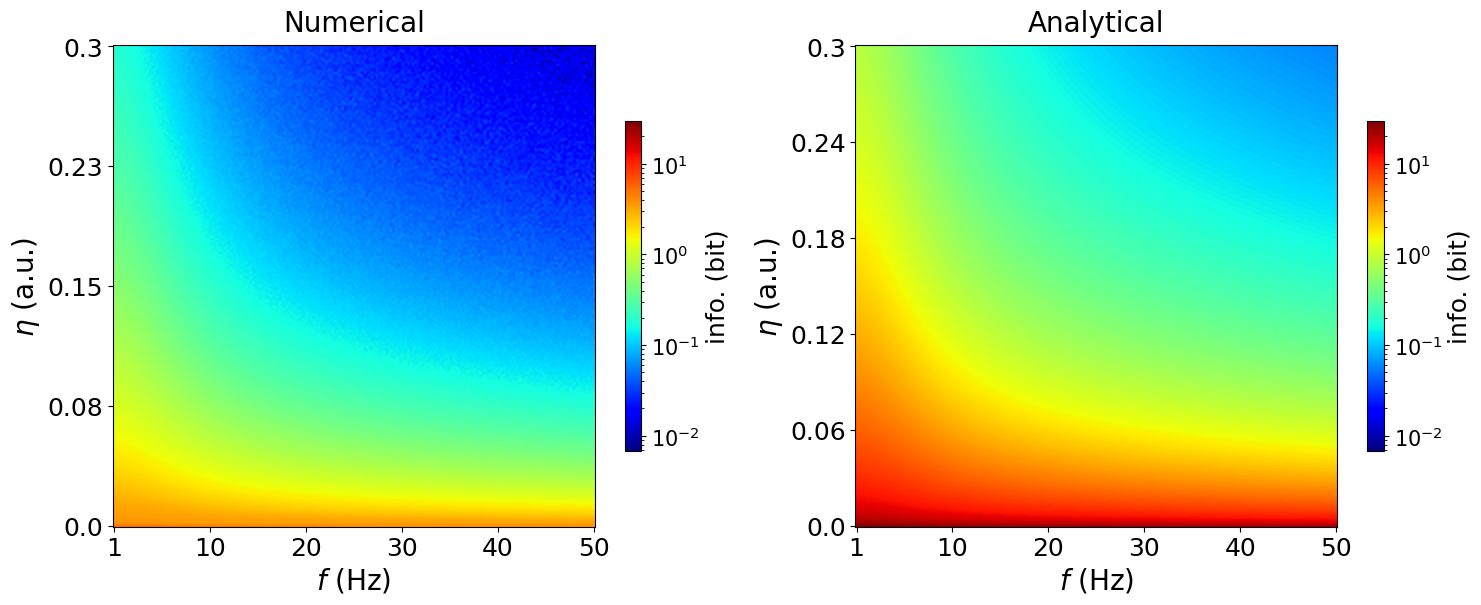

In [23]:
# Determine global min and max values for the color scale
global_min = min(mis_numerical[mis_numerical > 0].min(), mis_approx[mis_approx > 0].min())
global_max = max(mis_numerical.max(), mis_approx.max())

# Set up the figure and axis
plt.figure(figsize=(15, 7))

# Plot for the Numerical data
plt.subplot(121)
plt.title('Numerical', fontsize=20, pad=10)
norm = mcolors.LogNorm(vmin=global_min, vmax=global_max)
img1 = plt.imshow(mis_numerical, origin='lower', cmap='jet', norm=norm, interpolation='lanczos')
plt.xticks(np.linspace(0, res-1, 6), np.linspace(1, 50, 6).astype(int), fontsize=18)
plt.yticks(np.linspace(0, res-1, 5), np.linspace(0.001, 0.3, 5).round(2), fontsize=18)
plt.xlabel('$f$ (Hz)', fontsize=20)
plt.ylabel('$\eta$ (a.u.)', fontsize=20)
cbar = plt.colorbar(img1, label='info. (bit)', shrink=.5)
cbar.set_label('info. (bit)', fontsize=18)
cbar.ax.tick_params(labelsize=15)  # Increase colorbar tick fontsize

# Plot for the Approximated data
plt.subplot(122)
plt.title('Analytical', fontsize=20, pad=10)
img2 = plt.imshow(mis_approx, origin='lower', cmap='jet', norm=norm, interpolation='lanczos')
plt.xticks(np.linspace(0, res-1, 6), np.linspace(1, 50, 6).astype(int), fontsize=18)
plt.yticks(np.linspace(0, res-1, 6), np.linspace(0.001, 0.3, 6).round(2), fontsize=18)
plt.xlabel('$f$ (Hz)', fontsize=20)
plt.ylabel('$\eta$ (a.u.)', fontsize=20)
cbar = plt.colorbar(img2, label='info. (bit)', shrink=.5)
cbar.set_label('info. (bit)', fontsize=18)
cbar.ax.tick_params(labelsize=15)  # Increase colorbar tick fontsize

plt.tight_layout()

# Save the figure
#plt.savefig('plots/fig4/fig4_mutualinfo.svg', dpi=600)

# Show the plot
plt.show()